## Feature Engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from src.modules.feature_engineering import scale_encoder, num_null_replacement, print_null_features
from src.modules.load_source_data import load_data_set, load_agg_data

In [2]:
# get X and y (target variable)
# Load data
X, y = load_data_set()

# Save y
y.to_csv('./data/target.csv', index=False)
print(X.shape)
print(y.shape)

(545713, 27)
(545713,)


In [3]:
pd.set_option("display.max_columns", None)
X.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour
0,2018-09-28,WN,WN,WN,6253,WN,N8553W,6253,14122,PIT,"Pittsburgh, PA",13204,MCO,"Orlando, FL",1610,1825,N,135.0,1,834,2018,9,28,5,39,16,18
1,2018-09-28,WN,WN,WN,1798,WN,N7839A,1798,14492,RDU,"Raleigh/Durham, NC",10693,BNA,"Nashville, TN",620,650,N,90.0,1,442,2018,9,28,5,39,6,6
2,2018-09-28,WN,WN,WN,1058,WN,N457WN,1058,14492,RDU,"Raleigh/Durham, NC",11292,DEN,"Denver, CO",1940,2120,N,220.0,1,1436,2018,9,28,5,39,19,21
3,2018-09-28,WN,WN,WN,5745,WN,N916WN,5745,14570,RNO,"Reno, NV",12889,LAS,"Las Vegas, NV",2135,2245,N,70.0,1,345,2018,9,28,5,39,21,22
4,2018-09-28,WN,WN,WN,2610,WN,N7888A,2610,14570,RNO,"Reno, NV",14107,PHX,"Phoenix, AZ",1515,1655,N,100.0,1,601,2018,9,28,5,39,15,16


In [4]:
# drop features
train = X.copy()
to_drop = ['mkt_carrier', 'tail_num', 'origin_city_name', 'dest_city_name', 'dup', 'fl_date', 'branded_code_share', 'op_unique_carrier', 'origin', 'dest', 'flights']
train = train.drop(to_drop, axis=1)

In [5]:
train.shape

(545713, 16)

In [6]:
#load features - Passengers, fuel_comsumption
train = load_agg_data(train)

In [7]:
train.shape

(545713, 52)

In [8]:
train.head()

,mkt_unique_carrier,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_seats,month_flight_passengers,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers
0,WN,6253,6253,14122,13204,1610,1825,135.0,834,2018,9,28,5,39,16,18,-4.856410,109.010256,32.157895,0.000000,0.631579,0.0,52.473684,5.028351,112.404639,14.441176,1.338235,12.985294,0.000000,39.750000,9.794393,113.028037,22.666667,0.000000,12.095238,0.0,38.000000,16476,40367,70172.0,59846.0,156.688446,133.358861,78901284,62539560,153.984737,121.514593,157453740.2,4650071,3550404,17690901,14467289
1,WN,1798,1798,14492,10693,620,650,90.0,442,2018,9,28,5,39,6,6,-4.048485,67.618182,2.230769,0.000000,12.923077,0.0,14.769231,1.981250,71.656250,9.960784,2.705882,4.196078,0.313725,30.764706,-5.719780,72.972527,23.000000,0.000000,13.666667,0.0,0.000000,22739,26928,60873.0,49575.0,155.076923,115.956185,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,7613155,6149937
2,WN,1058,1058,14492,11292,1940,2120,220.0,1436,2018,9,28,5,39,19,21,-2.648148,195.500000,6.857143,2.428571,12.928571,0.0,19.214286,2.058824,204.663102,6.975610,1.365854,14.121951,0.000000,21.634146,8.785978,203.837638,8.296296,2.246914,11.530864,0.0,27.580247,22739,94040,40737.0,36525.0,159.000000,139.984087,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,29507455,25361777
3,WN,5745,5745,14570,12889,2135,2245,70.0,345,2018,9,28,5,39,21,22,-2.489642,54.472693,12.267857,0.678571,9.767857,0.0,17.642857,4.561924,53.954964,12.050279,1.318436,7.776536,0.128492,27.944134,11.378446,54.583960,5.500000,0.000000,5.277778,0.0,41.259259,7759,55700,191107.0,153579.0,155.233728,123.361095,78901284,62539560,153.984737,121.514593,157453740.2,2131372,1687478,23377952,19451761
4,WN,2610,2610,14570,14107,1515,1655,100.0,601,2018,9,28,5,39,15,16,-2.050847,82.966102,8.833333,0.000000,5.083333,0.0,28.583333,2.381643,81.864734,10.150000,0.250000,7.450000,0.000000,17.125000,13.243243,83.027027,4.666667,0.000000,8.083333,0.0,32.333333,7759,54624,43247.0,37946.0,157.545455,138.619067,78901284,62539560,153.984737,121.514593,157453740.2,2131372,1687478,19484366,15920715


In [9]:
sorted(list(train.columns))

['arr_hour_avg_air_time',
 'arr_hour_avg_arr_delay',
 'arr_hour_avg_carrier_delay',
 'arr_hour_avg_late_aircraft_delay',
 'arr_hour_avg_nas_delay',
 'arr_hour_avg_security_delay',
 'arr_hour_avg_weather_delay',
 'carrier_month_avg_passengers',
 'carrier_month_avg_seats',
 'carrier_month_passengers',
 'carrier_month_seats',
 'crs_arr_hour',
 'crs_arr_time',
 'crs_dep_hour',
 'crs_dep_time',
 'crs_elapsed_time',
 'day',
 'day_of_week',
 'day_of_week_avg_air_time',
 'day_of_week_avg_arr_delay',
 'day_of_week_avg_carrier_delay',
 'day_of_week_avg_late_aircraft_delay',
 'day_of_week_avg_nas_delay',
 'day_of_week_avg_security_delay',
 'day_of_week_avg_weather_delay',
 'dest_airport_id',
 'dest_airport_month_flight_seats',
 'dest_airport_month_passengers',
 'dest_total_flights',
 'distance',
 'mkt_carrier_fl_num',
 'mkt_unique_carrier',
 'month',
 'month_avg_air_time',
 'month_avg_arr_delay',
 'month_avg_carrier_delay',
 'month_avg_fuel_comsumption',
 'month_avg_late_aircraft_delay',
 'month_

In [10]:
# Remove nulls for numeric values
train_n_null = num_null_replacement(train)

Missing data:
-------------
                                      Total   Percent
month_flight_avg_passengers          104405  0.191319
month_flight_seats                   104405  0.191319
month_flight_passengers              104405  0.191319
month_flight_avg_seats               104405  0.191319
arr_hour_avg_carrier_delay             1782  0.003265
arr_hour_avg_security_delay            1782  0.003265
arr_hour_avg_late_aircraft_delay       1782  0.003265
arr_hour_avg_weather_delay             1782  0.003265
arr_hour_avg_nas_delay                 1782  0.003265
month_avg_late_aircraft_delay          1048  0.001920
month_avg_security_delay               1048  0.001920
month_avg_nas_delay                    1048  0.001920
month_avg_weather_delay                1048  0.001920
month_avg_carrier_delay                1048  0.001920
day_of_week_avg_nas_delay               478  0.000876
day_of_week_avg_weather_delay           478  0.000876
day_of_week_avg_security_delay          478  0.000876


In [11]:
train_n_null.dtypes[train_n_null.dtypes == 'object']

mkt_unique_carrier    object
dtype: object

In [12]:
train_cleaned, scaler = scale_encoder(train_n_null)

In [13]:
train_cleaned.head()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_seats,month_flight_passengers,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_VX,mkt_unique_carrier_WN
0,1.893785,1.893841,0.946877,0.343712,0.572560,0.660455,-0.041606,0.110167,-1.015623,0.709539,1.395902,1.045702,0.827629,0.609650,0.668852,-1.135759,0.017522,0.647211,-0.444834,-1.116909,-0.11551,1.650779,-0.062132,0.066616,-0.450133,-0.392393,-0.189790,-0.148416,1.018854,0.427236,0.075692,-0.001024,-0.505775,-0.246637,-0.122058,0.800159,-0.812728,-0.202576,-0.041475,-0.022690,0.507704,0.636804,0.762438,0.59002,-0.510727,-0.634112,0.289477,-0.880850,-0.890658,0.040002,0.018125,0,0,0,0,0,0,0,0,0,0,1
1,-0.497246,-0.497196,1.189824,-1.303335,-1.450706,-1.612082,-0.668422,-0.557588,-1.015623,0.709539,1.395902,1.045702,0.827629,-1.440840,-1.652217,-1.047212,-0.579820,-1.075525,-0.444834,-0.144812,-0.11551,-0.742518,-0.471223,-0.522310,-0.765373,-0.174552,-0.969538,0.357166,0.318727,-1.114148,-0.503041,0.016199,-0.505775,-0.116948,-0.122058,-1.424084,-0.653301,-0.544557,-0.144937,-0.157814,0.482510,0.317505,0.762438,0.59002,-0.510727,-0.634112,0.289477,-0.784070,-0.803152,-0.670015,-0.672725,0,0,0,0,0,0,0,0,0,0,1
2,-0.894409,-0.894360,1.189824,-0.910431,1.246982,1.231007,1.142382,1.135650,-1.015623,0.709539,1.395902,1.045702,0.827629,1.224796,1.249120,-0.893738,1.265683,-0.809211,-0.151043,-0.144377,-0.11551,-0.460367,-0.460808,1.400005,-0.975410,-0.387994,-0.088950,-0.148416,-0.392719,0.327047,1.387735,-0.743527,-0.211437,-0.293214,-0.122058,0.190262,-0.653301,1.163233,-0.368972,-0.329499,0.543844,0.758362,0.762438,0.59002,-0.510727,-0.634112,0.289477,-0.784070,-0.803152,0.872525,0.923034,0,0,0,0,0,0,0,0,0,0,1
3,1.621138,1.621193,1.241040,0.137094,1.645504,1.472767,-0.947008,-0.722824,-1.015623,0.709539,1.395902,1.045702,0.827629,1.634894,1.442542,-0.876366,-0.769527,-0.497747,-0.362745,-0.394348,-0.11551,-0.560114,-0.124752,-0.778143,-0.618356,-0.395547,-0.651892,0.058654,0.098950,0.584617,-0.768724,-0.888008,-0.505775,-0.809277,-0.122058,0.990932,-1.034624,0.187600,1.304063,1.210455,0.484961,0.453368,0.762438,0.59002,-0.510727,-0.634112,0.289477,-1.058348,-1.045447,0.440677,0.432141,0,0,0,0,0,0,0,0,0,0,1
4,-0.061439,-0.061388,1.241040,0.936020,0.378408,0.331663,-0.529130,-0.286738,-1.015623,0.709539,1.395902,1.045702,0.827629,0.404601,0.282007,-0.828275,-0.358330,-0.695453,-0.444834,-0.764833,-0.11551,0.134335,-0.417468,-0.374770,-0.752060,-0.565728,-0.680862,-0.148416,-0.744069,0.769891,-0.357771,-0.931066,-0.505775,-0.577736,-0.122058,0.468474,-1.034624,0.160219,-0.341046,-0.310804,0.521103,0.733317,0.762438,0.59002,-0.510727,-0.634112,0.289477,-1.058348,-1.045447,0.166358,0.138848,0,0,0,0,0,0,0,0,0,0,1


In [14]:
train_cleaned.to_csv('./data/train.csv', index=False)

#### Feature engineering - Clustering

In [4]:
X.shape

(9625, 27)

In [5]:
X.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour
0,2018-10-30,UA,UA_CODESHARE,UA,3997,EV,N13903,3997,12266,IAH,"Houston, TX",13256,MFE,"Mission/McAllen/Edinburg, TX",1455,1617,N,82,1,316,2018,10,30,2,44,14,16
1,2018-10-30,F9,F9,F9,529,F9,N301FR,529,10599,BHM,"Birmingham, AL",11292,DEN,"Denver, CO",1315,1518,N,183,1,1083,2018,10,30,2,44,13,15
2,2018-10-30,AA,AA,AA,2318,AA,N167AN,2318,11298,DFW,"Dallas/Fort Worth, TX",12892,LAX,"Los Angeles, CA",1740,1853,N,193,1,1235,2018,10,30,2,44,17,18
3,2018-10-30,AA,AA,AA,2375,AA,N962NN,2375,11298,DFW,"Dallas/Fort Worth, TX",14869,SLC,"Salt Lake City, UT",1855,2048,N,173,1,989,2018,10,30,2,44,18,20
4,2018-10-31,UA,UA,UA,746,UA,N68836,746,12173,HNL,"Honolulu, HI",14771,SFO,"San Francisco, CA",1433,2236,N,303,1,2398,2018,10,31,3,44,14,22


In [5]:
train_cluster = X.copy()

train_cluster = train_cluster.drop(['fl_date','branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num',\
                    'op_unique_carrier', 'op_carrier_fl_num', 'tail_num', 'origin', 'origin_city_name',\
                   'dest', 'dest_city_name', 'dup', 'flights'], axis=1)

In [6]:
total = train_cluster.isnull().sum().sort_values(ascending=False)
percent = (train_cluster.isnull().sum()/train_cluster.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
crs_arr_hour,0,0.0
crs_dep_hour,0,0.0
week_of_year,0,0.0
day_of_week,0,0.0
day,0,0.0
month,0,0.0
year,0,0.0
distance,0,0.0
crs_elapsed_time,0,0.0
crs_arr_time,0,0.0


In [7]:
train_cluster.dtypes

mkt_unique_carrier    object
origin_airport_id      int64
dest_airport_id        int64
crs_dep_time           int64
crs_arr_time           int64
crs_elapsed_time       int64
distance               int64
year                   int64
month                  int64
day                    int64
day_of_week            int64
week_of_year           int64
crs_dep_hour           int64
crs_arr_hour           int64
dtype: object

In [8]:
train_cluster, scaler = scale_encoder(train_cluster)

In [9]:
filter = train_cluster['mkt_unique_carrier_AS'].notna()
train_cluster[filter].shape

(9625, 24)

In [10]:
total = train_cluster.isnull().sum().sort_values(ascending=False)
percent = (train_cluster.isnull().sum()/train_cluster.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
mkt_unique_carrier_WN,183,0.018658
mkt_unique_carrier_VX,183,0.018658
dest_airport_id,183,0.018658
crs_dep_time,183,0.018658
crs_arr_time,183,0.018658
crs_elapsed_time,183,0.018658
distance,183,0.018658
year,183,0.018658
month,183,0.018658
day,183,0.018658


In [11]:
num_null_replacement(train_cluster)

Missing data:
-------------
                       Total   Percent
mkt_unique_carrier_WN    183  0.018658
mkt_unique_carrier_VX    183  0.018658
dest_airport_id          183  0.018658
crs_dep_time             183  0.018658
crs_arr_time             183  0.018658
crs_elapsed_time         183  0.018658
distance                 183  0.018658
year                     183  0.018658
month                    183  0.018658
day                      183  0.018658
day_of_week              183  0.018658
week_of_year             183  0.018658
crs_dep_hour             183  0.018658
crs_arr_hour             183  0.018658
mkt_unique_carrier_AA    183  0.018658
mkt_unique_carrier_AS    183  0.018658
mkt_unique_carrier_B6    183  0.018658
mkt_unique_carrier_DL    183  0.018658
mkt_unique_carrier_F9    183  0.018658
mkt_unique_carrier_G4    183  0.018658
mkt_unique_carrier_HA    183  0.018658
mkt_unique_carrier_NK    183  0.018658
mkt_unique_carrier_UA    183  0.018658
origin_airport_id        183  0.0186

,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_VX,mkt_unique_carrier_WN
0,-0.258539,0.381238,0.274783,0.261833,-0.771809,-0.762133,-1.018139,1.005961,1.634739,-0.489136,1.167812,0.218584,0.285853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.348294,-0.911835,-0.011907,0.067798,0.630635,0.534271,-1.018139,1.005961,1.634739,-0.489136,1.167812,0.013148,0.089777,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.891342,0.141585,0.858403,0.724379,0.769490,0.791186,-1.018139,1.005961,1.634739,-0.489136,1.167812,0.834893,0.678004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.891342,1.443216,1.093898,1.106567,0.491779,0.375390,-1.018139,1.005961,1.634739,-0.489136,1.167812,1.040329,1.070156,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.319335,1.378694,0.229732,1.475036,2.296904,2.756921,-1.018139,1.005961,1.749259,0.022763,1.167812,0.218584,1.462307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import Kmeans 
from sklearn.cluster import KMeans

def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()
    
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

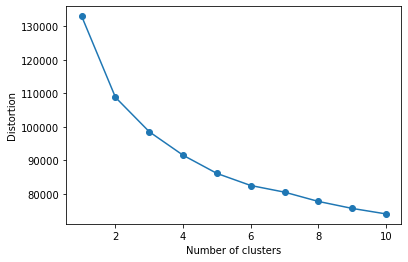

In [13]:
plot_distortion(train_cluster,max_clusters=10)

In [14]:
train_cluster.columns

Index(['origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'year', 'month', 'day', 'day_of_week',
       'week_of_year', 'crs_dep_hour', 'crs_arr_hour', 'mkt_unique_carrier_AA',
       'mkt_unique_carrier_AS', 'mkt_unique_carrier_B6',
       'mkt_unique_carrier_DL', 'mkt_unique_carrier_F9',
       'mkt_unique_carrier_G4', 'mkt_unique_carrier_HA',
       'mkt_unique_carrier_NK', 'mkt_unique_carrier_UA',
       'mkt_unique_carrier_VX', 'mkt_unique_carrier_WN'],
      dtype='object')